In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import sys
import numpy as np
import glob
import torch

sys.path.insert(1,"/home/showalte/research/prob_seq_queries/")
from seq_queries.utils import read_pkl, write_pkl

In [22]:
sampling_methods = ["importance_sampling","beam_search_is_hybrid"]
lens = [(17,20)]
temps = [1]
data_paths = "../data/{}/shakespeare/is_v_hybrid/val-dl_{}_{}h_{}s_{:03}t.pkl"

In [23]:
datas = []
for h,s in lens:
    for t in temps:
        data = []
        for sampling_method in sampling_methods:
            curr_data_path = data_paths.format(sampling_method, sampling_method,h,s,t)
            curr_data = read_pkl(curr_data_path)
            data.append(curr_data)
        datas.append(data)

In [30]:
imp_samp, hybrid = datas[-1]
imp_data = torch.gather(imp_samp['sample_est_var'],1,imp_samp['excluded_terms'].reshape(-1,1)).flatten().numpy()
hybrid_data = torch.gather(hybrid['hybrid_var'],1,hybrid['excluded_terms'].reshape(-1,1)).flatten().numpy()
print(imp_data.shape,hybrid_data.shape)

(2287,) (2287,)


In [31]:
# print(imp_data.mean())
diffs = (imp_data - hybrid_data)/(imp_data + 1e-10)

In [32]:
imp_data.max()/hybrid_data.max()

54.941673

In [33]:
diffs[diffs<0] = 0

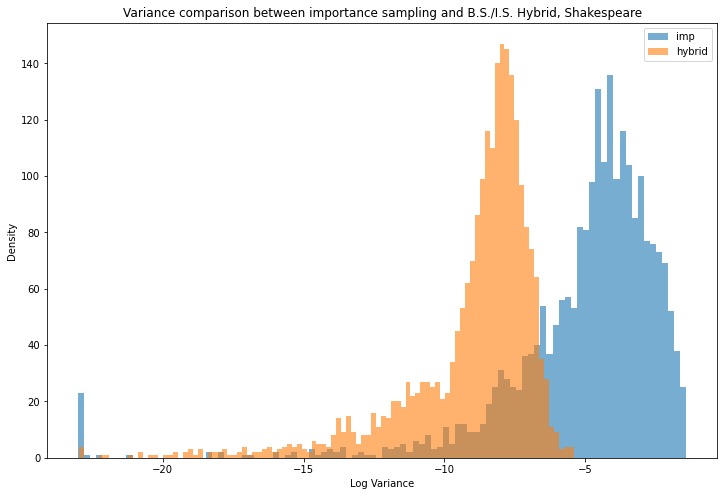

In [34]:
plt.figure(figsize=(12,8))
plt.hist(np.log(imp_data + 1e-10), label = "imp", bins = 100,alpha=0.6)
plt.hist(np.log(hybrid_data + 1e-10), label = "hybrid",bins=100,alpha=0.6)
plt.legend()
plt.xlabel("Log Variance")
plt.ylabel("Density")
plt.title("Variance comparison between importance sampling and B.S./I.S. Hybrid, Shakespeare")
plt.show()

# plt.hist(diffs.numpy(),bins=100)

0.95586836


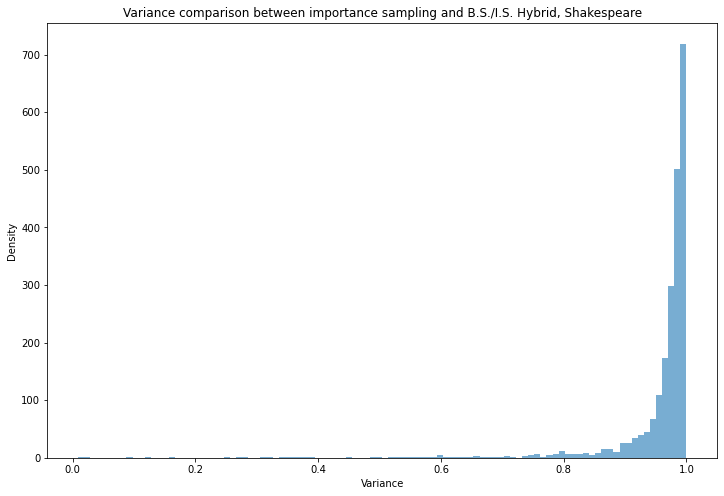

In [35]:
diffs = (imp_data - hybrid_data + 1e-10)/(imp_data + 1e-10)
diffs = diffs[diffs>=0]
print(diffs.mean())
plt.figure(figsize=(12,8))
plt.hist(diffs, label = "hybrid",bins=100,alpha=0.6)
plt.xlabel("Variance")
plt.ylabel("Density")
plt.title("Variance comparison between importance sampling and B.S./I.S. Hybrid, Shakespeare")
plt.show()
